In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import gym
from main.alpaca import *
from main.datagen import *
from main.dataViz import *

In [2]:
cfg_filename = 'configs/multistep-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.load(ymlfile)

In [3]:
DG = DataGenerator(config,None,'Multistep')
N_train = 5000
N_test = 500

noise1 = 0.1
noise2 = 0.3
noise3 = 0.5

Y1,X1,step_mat = DG.sample_trajectories(None,30,N_train,return_lists=True,sigma_eps=noise1)

lists = step_mat

Y2,X2 = DG.sample_trajectories(None,30,N_train,return_lists=False,sigma_eps=noise2,lists=lists)
Y3,X3 = DG.sample_trajectories(None,30,N_train,return_lists=False,sigma_eps=noise3,lists=lists)

Y_test1,X_test1,step_mat_test= DG.sample_trajectories(None,30,N_test,return_lists=True,sigma_eps=noise1)
lists_test = step_mat_test
np.random.seed(1)
Y_test1,X_test1 = DG.sample_trajectories(None,30,N_test,return_lists=False,sigma_eps=noise1,lists=lists_test)
np.random.seed(1)
Y_test2,X_test2 = DG.sample_trajectories(None,30,N_test,return_lists=False,sigma_eps=noise2,lists=lists_test)
np.random.seed(1)
Y_test3,X_test3 = DG.sample_trajectories(None,30,N_test,return_lists=False,sigma_eps=noise3,lists=lists_test)

## Default agent

In [4]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g1)
agent1 = ALPaCA(config)
agent1.sigma_scalar = noise1
agent1.construct_model(sess1,g1)
agent1.train(sess1,Y1,X1,1000)

loss: 1.8162441
loss: -0.45139346
loss: -0.8453573
loss: -0.64837676
loss: -0.7864013
loss: -1.0517542
loss: -0.5474906
loss: -1.006547
loss: -0.8442462
loss: -1.1528332
loss: -1.1510104
loss: -1.0564344
loss: -0.79487705
loss: -0.9892624
loss: -0.96883297
loss: -1.0928152
loss: -1.0718478
loss: -1.0732783
loss: -1.0074685
loss: -1.1670407


In [5]:
g2 = tf.Graph()
sess2 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g2)
agent2 = ALPaCA(config)
agent2.sigma_scalar = noise2
agent2.construct_model(sess2,g2)
agent2.train(sess2,Y2,X2,1000)

loss: 0.92563516
loss: -0.20310202
loss: -0.24494465
loss: -0.19185312
loss: -0.2977974
loss: -0.29453024
loss: -0.3208033
loss: -0.3440317
loss: -0.43861994
loss: -0.37475747
loss: -0.22366352
loss: -0.3394343
loss: -0.35746703
loss: -0.33458918
loss: -0.43973798
loss: -0.4410054
loss: -0.3448683
loss: -0.45036238
loss: -0.34300295
loss: -0.3851537


In [6]:
g3 = tf.Graph()
sess3 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g3)
agent3 = ALPaCA(config)
agent3.sigma_scalar = noise3
agent3.construct_model(sess3,g3)
agent3.train(sess3,Y3,X3,1000)

loss: 0.6445987
loss: 0.37211123
loss: 0.18312247
loss: 0.24243322
loss: 0.27283993
loss: 0.2567441
loss: 0.18449709
loss: 0.24092567
loss: 0.24696405
loss: 0.122393705
loss: 0.09015655
loss: 0.1214839
loss: 0.21666935
loss: 0.23175982
loss: 0.10470478
loss: 0.33303317
loss: 0.1917779
loss: 0.15782006
loss: 0.20005748
loss: 0.2098939


# Visualize all agents

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-pac

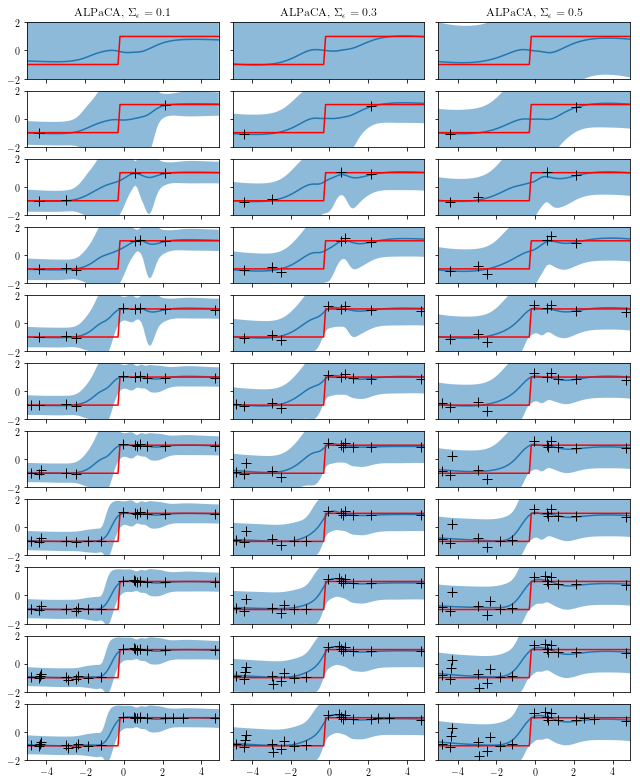

In [7]:
ind = 2
sample_size_list = [0,2,4,6,8,10,12,14,16,18,20]
plt.figure(figsize=(9,len(sample_size_list)*1))
for i,num_pts in enumerate(sample_size_list):
    X_update1 = X_test1[ind:(ind+1),:num_pts,:]
    Y_update1 = Y_test1[ind:(ind+1),:num_pts,:]
    
    X_update2 = X_test2[ind:(ind+1),:num_pts,:]
    Y_update2 = Y_test2[ind:(ind+1),:num_pts,:]
    
    X_update3 = X_test3[ind:(ind+1),:num_pts,:]
    Y_update3 = Y_test3[ind:(ind+1),:num_pts,:]
    
    title=None
    legend=False
    if i == 0:
        legend=True
        title=True

    ax1 = plt.subplot(len(sample_size_list),3,3*i+1)
    gen_multistep_fig(agent1, sess1, X_update1, Y_update1, step_mat_test[ind,:], label=None)
    if i == 0:
        plt.title(r'ALPaCA, ' + r'$\Sigma_\epsilon = 0.1$')
    if i < len(sample_size_list) - 1:
        plt.setp(ax1.get_xticklabels(), visible=False)
        
    ax2 = plt.subplot(len(sample_size_list),3,3*i+2, sharey=ax1)
    gen_multistep_fig(agent2, sess2, X_update2, Y_update2, step_mat_test[ind,:], label=None)
    plt.setp(ax2.get_yticklabels(), visible=False)
    if i == 0:
        plt.title(r'ALPaCA, ' + r'$\Sigma_\epsilon = 0.3$')
    if i < len(sample_size_list) - 1:
        plt.setp(ax2.get_xticklabels(), visible=False)
    
    
    ax3 = plt.subplot(len(sample_size_list),3,3*i+3, sharey=ax1)
    gen_multistep_fig(agent3, sess3, X_update3, Y_update3, step_mat_test[ind,:], label=None)
    plt.setp(ax3.get_yticklabels(), visible=False)
    if i == 0:
        plt.title(r'ALPaCA, ' + r'$\Sigma_\epsilon = 0.5$')
    if i < len(sample_size_list) - 1:
        plt.setp(ax3.get_xticklabels(), visible=False)

plt.tight_layout(w_pad=0.0,h_pad=0.2)
plt.savefig('figures/multistep_varying_noise.pdf')
plt.show()

/cvgl2/u/rsluo/hand_trajectory/ALPaCA/main/dataViz.py:192: RuntimeWarning: covariance is not positive-semidefinite.
  K_vec = np.random.multivariate_normal(mean,cov,n_samples)


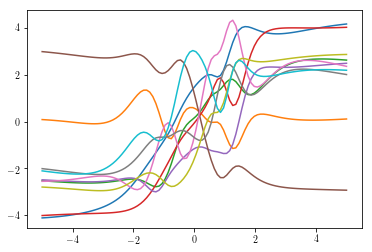

In [8]:
agent = agent1
K,L = sess1.run([agent.K, agent.L])
x_range = np.reshape( np.linspace(-5,5,100), (1,100,1) )
phi = sess1.run( agent.phi, {agent.x: x_range} ) #agent.encode(sess,x_range)
plot_sample_fns(x_range,phi,K,L,sess1.run(agent.SigEps),10)

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-pac

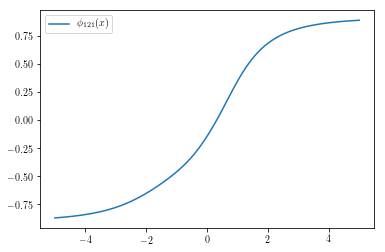

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


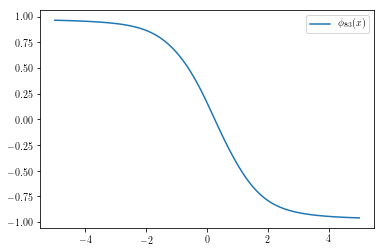

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


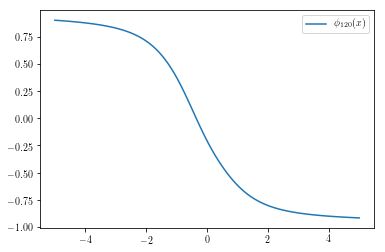

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-pac

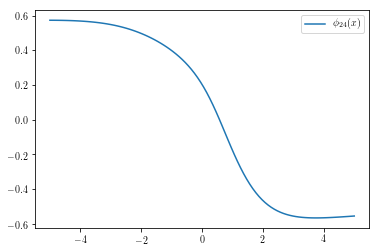

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


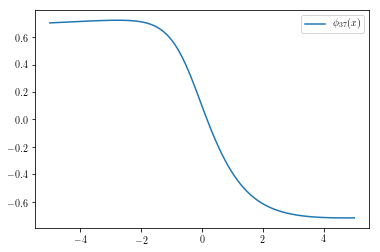

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-pac

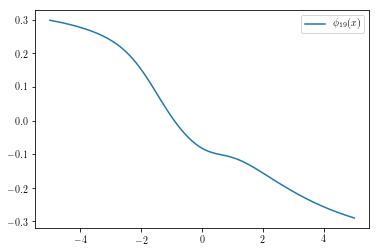

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


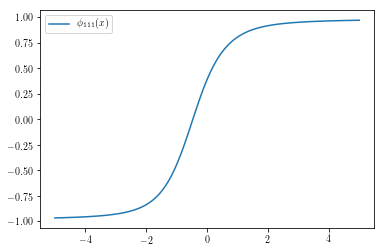

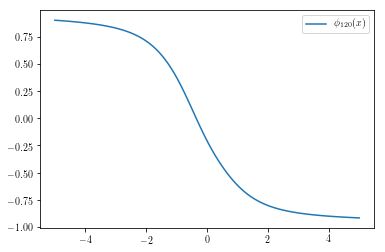

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


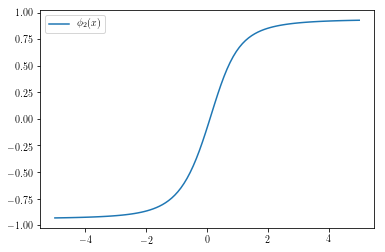

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


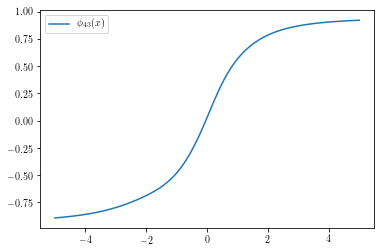

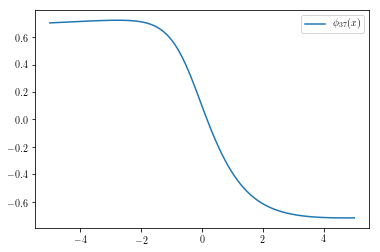

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


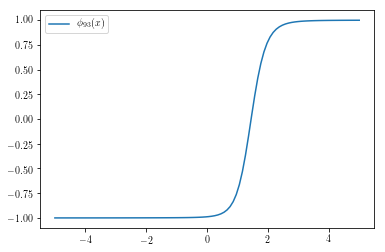

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


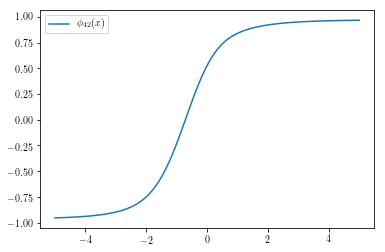

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


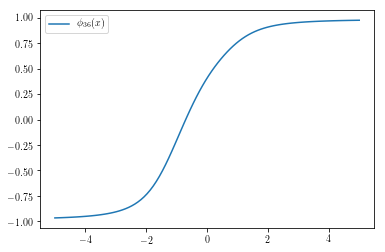

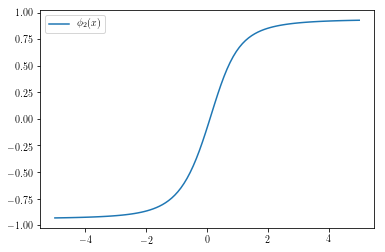

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


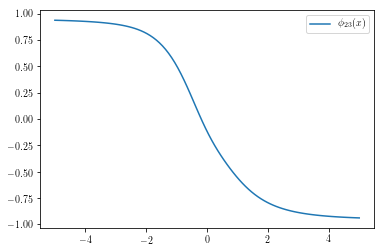

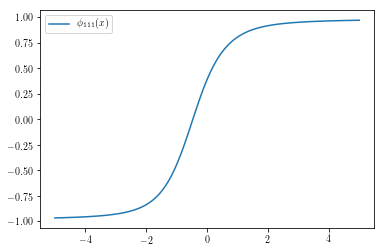

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


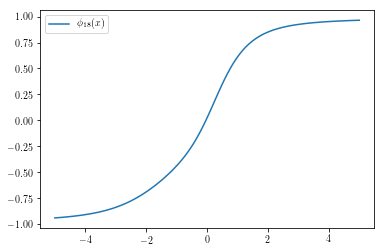

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


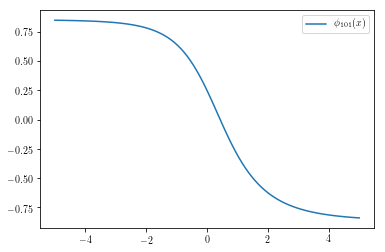

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


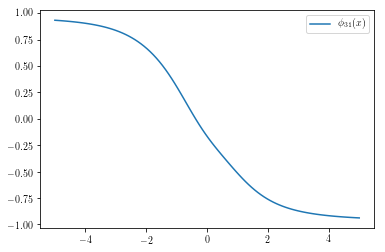

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


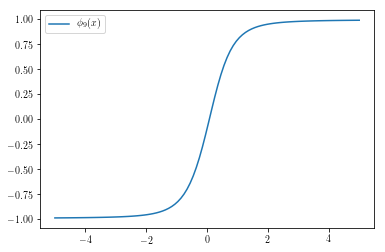

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


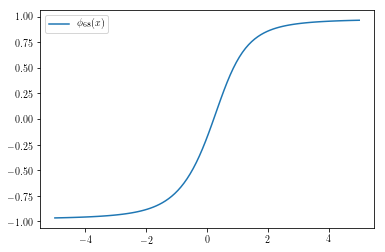

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


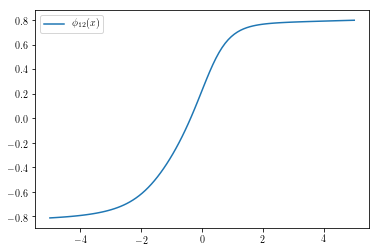

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


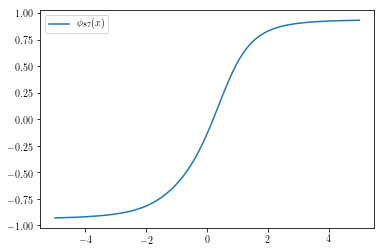

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


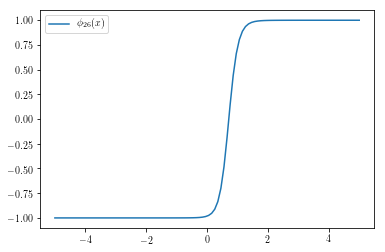

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


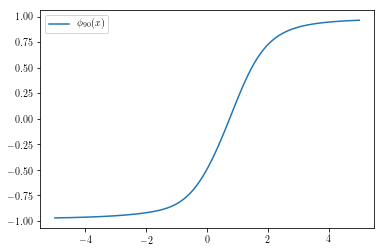

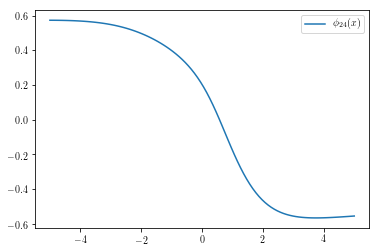

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


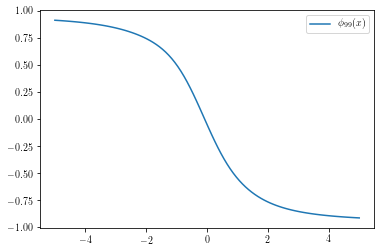

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


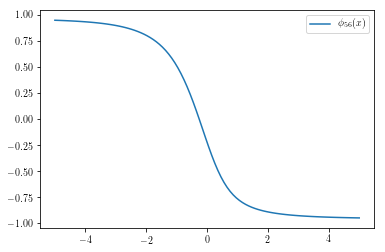

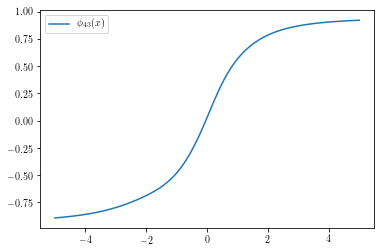

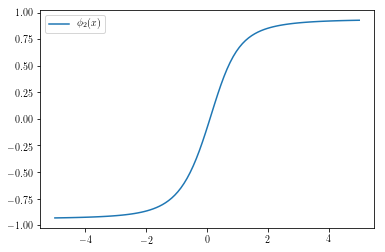

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


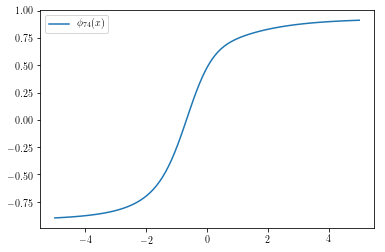

In [9]:
x_range = np.reshape( np.linspace(-5,5,100), (1,100,1) )
gen_sin_bases_fig(agent, sess1, x_range, 32)